Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2020/2021  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 1: Regresija

*Verzija: 1.3  
Zadnji put ažurirano: 6. 10. 2020.*

(c) 2015-2020 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **19. 10. 2020. u 06:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od osam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno** ili u **tandemu**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [2]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [7]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [30]:
from sklearn.preprocessing import PolynomialFeatures

poly_f1 = PolynomialFeatures(1, include_bias=True)
phi = poly_f1.fit_transform(X)
print("\u03A6 =\n{}". format(phi))

Φ =
[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]


Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [41]:
from numpy import linalg

pseudoinv = dot(inv(dot(phi.transpose(), phi)), phi.transpose())
w = dot(pseudoinv, y)
print("w:\n{}".format(w))
print()

w_by_pseudoinv = dot(pinv(phi), y)
print("w (calculated by pseudoinverse):\n{}".format(w_by_pseudoinv))

w:
[2.2        0.45714286]

w (calculated by pseudoinverse):
[2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

In [48]:
from sklearn.metrics import mean_squared_error

y_true = []
y_pred = []

for i, sample in enumerate(phi):
    
    print("{}. primjer:".format(i + 1))
    print("x =", sample, "y =", y[i])
    
    h = dot(w, sample)
    print("h(x) = {}".format(h))
    print()
    
    y_true.append(y[i])
    y_pred.append(h)

train_loss = mean_squared_error(y_true, y_pred)
print("Train loss: E(h|D) = {}".format(train_loss))

1. primjer:
x = [1. 0.] y = 4
h(x) = 2.2000000000000024

2. primjer:
x = [1. 1.] y = 1
h(x) = 2.6571428571428592

3. primjer:
x = [1. 2.] y = 2
h(x) = 3.114285714285716

4. primjer:
x = [1. 4.] y = 5
h(x) = 4.02857142857143

Train loss: E(h|D) = 2.0428571428571427


### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [61]:
#w_test = dot(linalg.inv(phi), y)

poly1 = PolynomialFeatures(3, include_bias=True)
phi_test = poly1.fit_transform(X)
print("\u03A6 = ")
print(phi_test)

w_test = dot(linalg.inv(phi_test), y)
print("w = {}".format(w_test))

Φ = 
[[ 1.  0.  0.  0.]
 [ 1.  1.  1.  1.]
 [ 1.  2.  4.  8.]
 [ 1.  4. 16. 64.]]
w = [ 4.         -5.91666667  3.375      -0.45833333]


### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [100]:
from sklearn.linear_model import LinearRegression

poly_f1 = PolynomialFeatures(1, include_bias=False)
phi = poly_f1.fit_transform(X)

model1e = LinearRegression(fit_intercept=True).fit(phi, y)
w0 = model1e.intercept_
w = model1e.coef_
print("w0 = {}".format(w0))
print("w = {}".format(w))

y_pred = []
for sample in phi:
    y_pred.append(model1e.predict(np.array([sample])))
    
print()
train_loss = mean_squared_error(y_true, y_pred)
print("Train loss: E(h|D) = {}".format(train_loss))

w0 = 2.2
w = [0.45714286]

Train loss: E(h|D) = 2.042857142857143


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [179]:
from numpy.random import normal

def make_labels(X, f, noise=0):
    y = []
    for sample in X:
        y.append(f(sample[0]) + random.normal(0.0, noise))
    return np.array(y)

In [180]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [181]:
N = 50
start = -5
end = 5
X = make_instances(start, end, N)

function = lambda x: 5 + x - 2*(x**2) - 5*(x**3)
sigma = 200
y = make_labels(X, function, sigma)

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

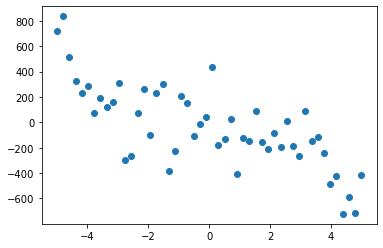

In [182]:
plt.scatter(X, y)
plt.show()

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

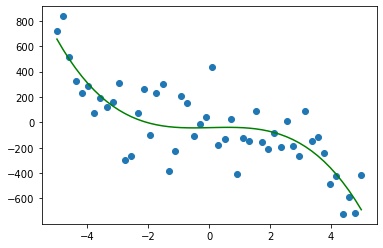

Train loss: E(h|D) = 34108.17402009033


In [205]:
d = 3
poly2 = PolynomialFeatures(d, include_bias=False)
phi = poly2.fit_transform(X)

model2b = LinearRegression(fit_intercept=True).fit(phi, y)
y_pred = model2b.predict(phi)

plt.scatter(X, y)
plt.plot(X, y_pred, c="green")
plt.show()

train_loss = mean_squared_error(y, y_pred)
print("Train loss: E(h|D) = {}".format(train_loss))

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

Train loss: E(h1|D) = 46726.457144421765
Train loss: E(h3|D) = 34108.17402009033
Train loss: E(h5|D) = 32321.27918704933
Train loss: E(h10|D) = 27354.41158302681
Train loss: E(h20|D) = 22138.040805046992


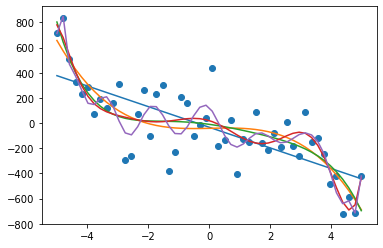

In [206]:
plt.scatter(X, y)

degs = [1, 3, 5, 10, 20]

for deg in degs:
    
    poly3 = PolynomialFeatures(deg, include_bias=False)
    phi = poly3.fit_transform(X)

    model_d = LinearRegression(fit_intercept=True).fit(phi, y)
    
    y_pred = model_d.predict(phi)
    
    plt.plot(X, y_pred)

    train_loss = mean_squared_error(y, y_pred)
    print("Train loss: E(h{}|D) = {}".format(deg, train_loss))
    
plt.show()

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih pet modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

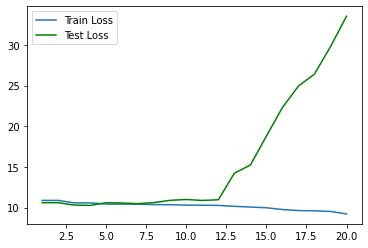

In [207]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

degs = [i for i in range(1, 21)]
train_losses = []
test_losses = []

for deg in degs:
    
    poly3 = PolynomialFeatures(deg, include_bias=False)
    phi = poly3.fit_transform(X_train)

    model_d = LinearRegression(fit_intercept=True).fit(phi, y_train)
    y_pred = []
    
    y_pred = model_d.predict(phi)

    train_loss = mean_squared_error(y_train, y_pred)
    train_losses.append(math.log(train_loss))
    
    phi = poly3.fit_transform(X_test)
    y_pred = model_d.predict(phi)
    
    test_loss = mean_squared_error(y_test, y_pred)
    test_losses.append(math.log(test_loss))
    
plt.plot(degs, train_losses, label="Train Loss")
plt.plot(degs, test_losses, c="green", label="Test Loss")
plt.legend(loc="best")
plt.show()

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

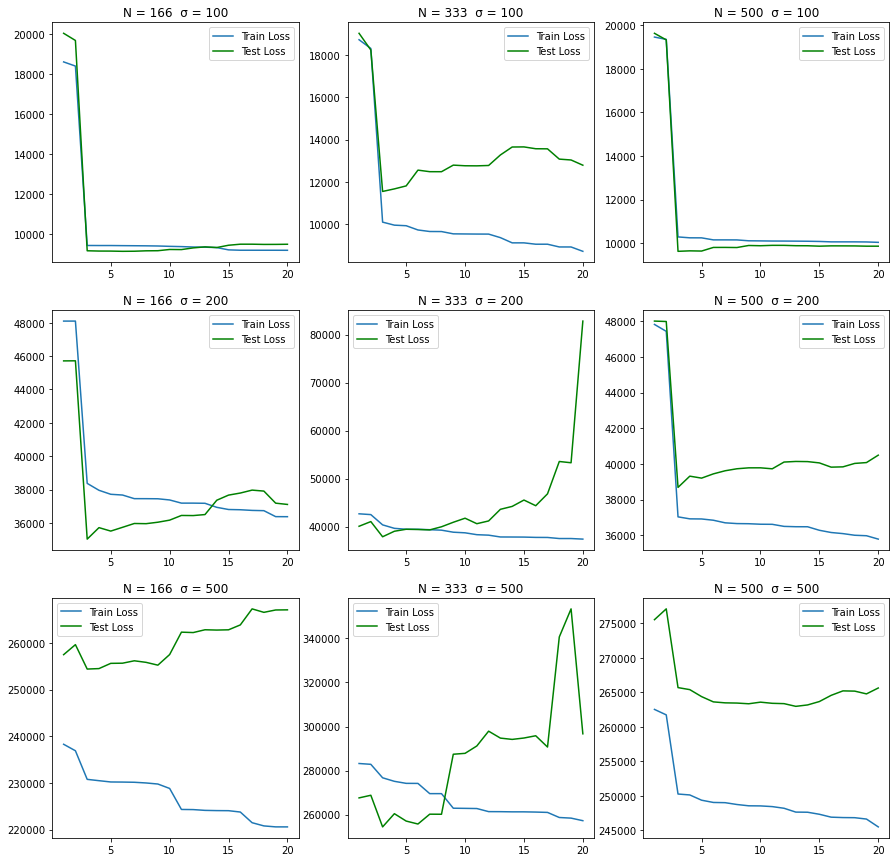

In [218]:
f, plot_array = plt.subplots(3, 3)
f.set_figheight(15)
f.set_figwidth(15)

Ntotal = 1000
start = -5
end = 5
function = lambda x: 5 + x - 2*(x**2) - 5*(x**3)

X = make_instances(start, end, Ntotal)
y = make_labels(X, function, 200)

X_train, X_test = train_test_split(X, test_size=0.5)


sigmas = [100, 200, 500]
N = [1/3, 2/3, 1]

for i in range(len(sigmas)):
    
    for j in range(len(N)):
        
        # 1/3, 2/3, 1
        X_train_final, surplus = train_test_split(X_train, test_size=N[j])
        X_test_final, surplus = train_test_split(X_test, test_size=N[j])
        
        y_train_final = make_labels(X_train_final, function, sigmas[i])
        y_test_final = make_labels(X_test_final, function, sigmas[i])
        
        degs = [k for k in range(1, 21)]
        train_losses = []
        test_losses = []
        
        for deg in degs:
            poly = PolynomialFeatures(deg, include_bias=True)
            phi = poly.fit_transform(X_train_final)

            model_d = LinearRegression().fit(phi, y_train_final)
            
            y_pred = model_d.predict(phi)

            train_loss = mean_squared_error(y_train_final, y_pred)
            train_losses.append(train_loss)
    
            phi = poly.fit_transform(X_test_final)
            y_pred = model_d.predict(phi)
    
            test_loss = mean_squared_error(y_test_final, y_pred)
            test_losses.append(test_loss)
        
        plot_array[i, j].set_title("N = {}  \u03C3 = {}".format(int(N[j]*0.5*Ntotal), sigmas[i]))
        plot_array[i, j].plot(degs, train_losses, label="Train Loss")
        plot_array[i, j].plot(degs, test_losses, c="green", label="Test Loss")
        plot_array[i, j].legend(loc="best")

plt.show()

***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [223]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

d = 3
lambdas = [0, 1, 10]

for l in lambdas:
    
    poly4 = PolynomialFeatures(d, include_bias=True)
    phi = poly4.fit_transform(X)
    
    w = dot(dot(inv(dot(phi.transpose(), phi) + l*identity(len(phi))), phi.transpose()), y)
    print("\u03BB = {}\t=> w = {}".format(l, w))

λ = 0	=> w = [ 4.         -5.91666667  3.375      -0.45833333]
λ = 1	=> w = [ 1.79567372 -0.24729075 -0.0175289   0.07014758]
λ = 10	=> w = [0.43312265 0.11060671 0.13827839 0.03093411]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [237]:
from sklearn.linear_model import Ridge

for l in lambdas:
    poly4 = PolynomialFeatures(d, include_bias=True)
    phi = poly4.fit_transform(X)
    
    clf = Ridge(alpha=l, fit_intercept=False)
    clf.fit(phi, y)
    print("\u03BB = {}\tw0 = {}\tw = {}".format(l, clf.intercept_, clf.coef_))

λ = 0	w0 = 0.0	w = [ 4.         -5.91666667  3.375      -0.45833333]
λ = 1	w0 = 0.0	w = [ 1.79567372 -0.24729075 -0.0175289   0.07014758]
λ = 10	w0 = 0.0	w = [0.43312265 0.11060671 0.13827839 0.03093411]


### 5. Regularizirana polinomijalna regresija

### (a)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

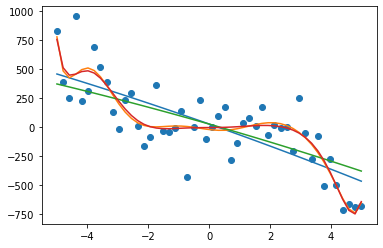

In [243]:
N = 50
lambdas = [0, 100]
degs = [2, 10]
start = -5
end = 5
X = make_instances(start, end, N)

function = lambda x: 5 + x - 2*(x**2) - 5*(x**3)
sigma = 200
y = make_labels(X, function, sigma)

plt.scatter(X, y)

for l in lambdas:
    
    for d in degs:
        
        poly5 = PolynomialFeatures(d, include_bias=False)
        phi = poly5.fit_transform(X)
    
        clf = Ridge(alpha=l, fit_intercept=True)
        clf.fit(phi, y)
        y_pred = clf.predict(phi)
            
        plt.plot(X, y_pred)
        
plt.show()

### (b)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


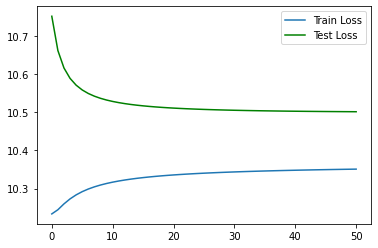

In [256]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
d = 10
lambdas = [i for i in range(51)]
train_losses = []
test_losses = []

for l in lambdas:
    
    poly5 = PolynomialFeatures(d, include_bias=True)
    clf = Ridge(alpha=l)
        
    # train set
    phi = poly5.fit_transform(X_train)
    clf.fit(phi, y_train)
    y_pred =clf.predict(phi)
            
    train_loss = mean_squared_error(y_train, y_pred)
    train_losses.append(math.log(train_loss))
            
    # test set
    phi = poly5.fit_transform(X_test)
    y_pred = clf.predict(phi)
    
    test_loss = mean_squared_error(y_test, y_pred)
    test_losses.append(math.log(test_loss))
            
plt.plot(lambdas, train_losses, label="Train Loss")
plt.plot(lambdas, test_losses, label="Test Loss", c="green")
plt.legend(loc="best")
plt.show()

### 6. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [32]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

In [64]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

In [63]:
from sklearn.linear_model import Lasso
# Vaš kôd ovdje

### 7. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [65]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

In [66]:
# Vaš kôd ovdje

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [67]:
# Vaš kôd ovdje

Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [68]:
from sklearn.preprocessing import StandardScaler
# Vaš kôd ovdje

**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 8. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [69]:
# Vaš kôd ovdje

Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [70]:
# Vaš kôd ovdje

**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [71]:
# Vaš kôd ovdje

**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.